<h1> Testing Data </h1> <br>
<h3> Mostly me looking around in the data to see for links </h3>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# File: Cases_By_County__Beginning_2009-10_Season.csv
data = pd.read_csv('../Cases_By_County__Beginning_2009-10_Season.csv')
pd.set_option('display.max_columns', None)
data.head()

,Season,Region,County,CDC Week,Week Ending Date,Disease,Count,County Centroid,FIPS
0,2009-2010,NYC,BRONX,15,04/17/2010,INFLUENZA_A,0,"(40.8448, -73.8648)",36005
1,2009-2010,NYC,BRONX,15,04/17/2010,INFLUENZA_B,0,"(40.8448, -73.8648)",36005
2,2009-2010,NYC,BRONX,48,12/05/2009,INFLUENZA_A,91,"(40.8448, -73.8648)",36005
3,2009-2010,CAPITAL DISTRICT,ALBANY,1,01/09/2010,INFLUENZA_A,0,"(42.5882713, -73.9740136)",36001
4,2009-2010,CAPITAL DISTRICT,ALBANY,1,01/09/2010,INFLUENZA_B,0,"(42.5882713, -73.9740136)",36001


In [3]:
data = data.drop(['FIPS','County Centroid'], axis=1) # Removing data we won't really use

In [4]:
data.isnull().sum() # Good, none of our data is empty

Season              0
Region              0
County              0
CDC Week            0
Week Ending Date    0
Disease             0
Count               0
dtype: int64

In [5]:
data.head()

,Season,Region,County,CDC Week,Week Ending Date,Disease,Count
0,2009-2010,NYC,BRONX,15,04/17/2010,INFLUENZA_A,0
1,2009-2010,NYC,BRONX,15,04/17/2010,INFLUENZA_B,0
2,2009-2010,NYC,BRONX,48,12/05/2009,INFLUENZA_A,91
3,2009-2010,CAPITAL DISTRICT,ALBANY,1,01/09/2010,INFLUENZA_A,0
4,2009-2010,CAPITAL DISTRICT,ALBANY,1,01/09/2010,INFLUENZA_B,0


In [6]:
influenza_a = data[data['Disease'] == "INFLUENZA_A"]
influenza_b = data[data['Disease'] == "INFLUENZA_B"]
influenza_c = data[data['Disease'] == "INFLUENZA_C"]
influenza_a.head()

,Season,Region,County,CDC Week,Week Ending Date,Disease,Count
0,2009-2010,NYC,BRONX,15,04/17/2010,INFLUENZA_A,0
2,2009-2010,NYC,BRONX,48,12/05/2009,INFLUENZA_A,91
3,2009-2010,CAPITAL DISTRICT,ALBANY,1,01/09/2010,INFLUENZA_A,0
6,2009-2010,CAPITAL DISTRICT,ALBANY,2,01/16/2010,INFLUENZA_A,0
9,2009-2010,CAPITAL DISTRICT,ALBANY,3,01/23/2010,INFLUENZA_A,0


In [7]:
# Let's store the data only in the NYC Region
influenza_a_nyc = influenza_a[influenza_a['Region'] == "NYC"]
influenza_a_kings = influenza_a[influenza_a['County']=="KINGS"]
influenza_a_queens = influenza_a[influenza_a['County']=="QUEENS"]
influenza_a_bronx = influenza_a[influenza_a['County']=="BRONX"]

In [8]:
# size(kings) = size(queens) = size(bronx)
# Now we have data we want seperated properl, and in weekly intervals
# Convert into datetimes
influenza_a_kings.loc[:,'Week Ending Date'] = pd.to_datetime(influenza_a_kings['Week Ending Date'])
influenza_a_queens.loc[:,'Week Ending Date'] = pd.to_datetime(influenza_a_queens['Week Ending Date'])
influenza_a_bronx.loc[:,'Week Ending Date'] = pd.to_datetime(influenza_a_bronx['Week Ending Date'])
# Now we want the index of the dataset to go by the Week Ending Date
influenza_a_kings.index = influenza_a_kings['Week Ending Date']
influenza_a_queens.index = influenza_a_queens['Week Ending Date']
influenza_a_bronx.index = influenza_a_bronx['Week Ending Date']
# Now we can do time specific things with the data


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
# Now let's check out some things that are in the count database for Kings county
influenza_a_kings.loc[:,'Count'].describe()

count     325.000000
mean       96.369231
std       200.170989
min         0.000000
25%         4.000000
50%        18.000000
75%        90.000000
max      1179.000000
Name: Count, dtype: float64

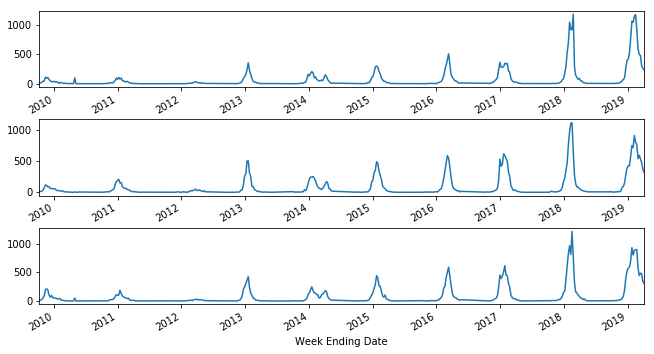

In [10]:
# And let's get all the graphs
plt.figure(figsize=(14,6))
plt.subplots_adjust(left=0.3,hspace=0.42)
plt.title("Influenza Counts for NYC Counties")
plt.subplot(311)
influenza_a_kings.loc[:,'Count'].plot(ax = plt.gca())
plt.subplot(312)
influenza_a_bronx.loc[:,'Count'].plot(ax = plt.gca())
plt.subplot(313)
influenza_a_queens.loc[:,'Count'].plot(ax = plt.gca())

In [11]:
# All the flu seems to happen around the same time

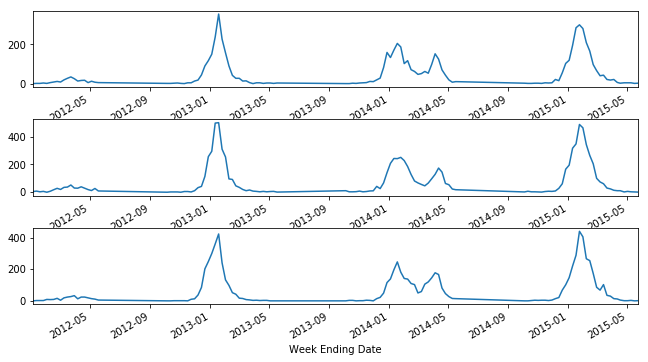

In [12]:
# Let's zoom in on the first policy
# between 2012 --> 2015-6
plt.figure(figsize=(14,6))
plt.subplots_adjust(left=0.3,hspace=0.42)
plt.title("Influenza Counts for NYC Counties")
plt.subplot(311)
influenza_a_kings.loc['2012':'2015-6','Count'].plot(ax = plt.gca())
plt.subplot(312)
influenza_a_bronx.loc['2012':'2015-6','Count'].plot(ax = plt.gca())
plt.subplot(313)
influenza_a_queens.loc['2012':'2015-6','Count'].plot(ax = plt.gca())